In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('HR_Analytics.csv')

In [5]:
df.isnull().sum()


,0
EmpID,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0


In [6]:
df = df.dropna()


In [7]:
df['Attrition'].value_counts(normalize=True)


,proportion
Attrition,
No,0.83837
Yes,0.16163


In [8]:
df['Attrition'] = df['Attrition'].map({'No':0, 'Yes':1})



In [9]:
df = pd.get_dummies(df, drop_first=True)


In [10]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test)


In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.856140350877193


In [15]:
np.mean(df['MonthlyIncome'])


np.float64(6521.546029515109)

In [16]:
np.round(df['MonthlyIncome'].mean(), 2)


np.float64(6521.55)

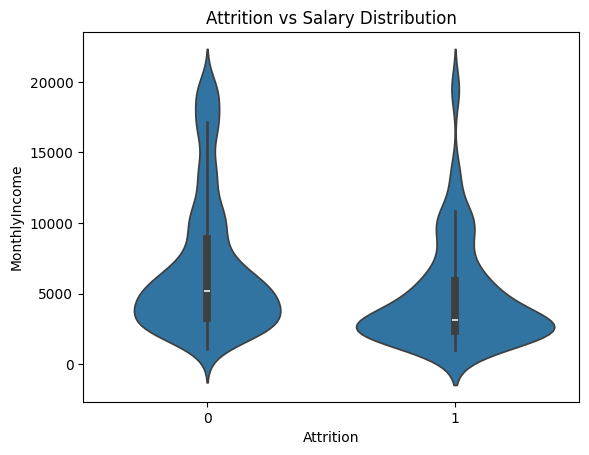

In [17]:
sns.violinplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Salary Distribution")
plt.show()


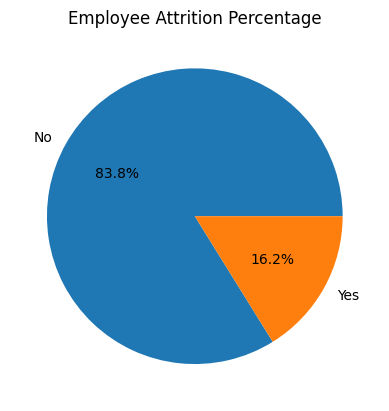

In [18]:
counts = df['Attrition'].value_counts()

plt.pie(counts, labels=['No','Yes'], autopct='%1.1f%%')
plt.title("Employee Attrition Percentage")
plt.show()
